In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def enhance_night_image(image_path):
    # Load the image
    image = cv2.imread(image_path, 0)  # Read as grayscale image

    # Apply adaptive histogram equalization to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(6, 6))
    enhanced_image = clahe.apply(image)

    # Apply bilateral filter to reduce noise while preserving edges
    filtered_image = cv2.bilateralFilter(enhanced_image, 10, 55, 55)

    # Increase brightness and contrast
    brightness_alpha = 2  # Brightness control (1.0-3.0)
    contrast_beta = 40  # Contrast control (0-100)
    enhanced_image = cv2.convertScaleAbs(filtered_image, alpha=brightness_alpha, beta=contrast_beta)
    unsharp_image = cv2.addWeighted(image, 7, enhanced_image, -0.5, 0)

    return unsharp_image

In [3]:
# Example usage
image_paths = {
    1: 'cctv1.JPG',
    2: 'cctv2.JPG',
    3: 'cctv3.JPG',
    4: 'cctv4.JPG'
}

In [10]:
image_value = int(input("Enter image value: "))
input_image_path = image_paths.get(image_value)


Enter image value: 4


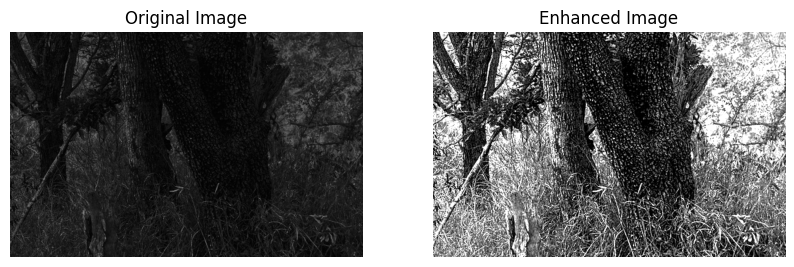

In [11]:
if input_image_path:
    output_image = enhance_night_image(input_image_path)

    # Display the original and enhanced images
    output_image = enhance_night_image(input_image_path)
    cv2.imwrite('sharpened_image.jpg', output_image)
    fig, (original_ax, enhanced_ax) = plt.subplots(1, 2, figsize=(10, 5))
    original_ax.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
    original_ax.set_title('Original Image')
    original_ax.axis('off')
    enhanced_ax.imshow(output_image, cmap='gray')
    enhanced_ax.set_title('Enhanced Image')
    enhanced_ax.axis('off')
    plt.show()
else:
    print("Invalid image value.")